# Réseaux de Neurones Profonds  
Ajoutez des couches cachées à votre réseau pour découvrir des relations complexes.  

## Introduction  
Dans cette leçon, nous allons voir comment construire des réseaux de neurones capables d'apprendre les types de relations complexes pour lesquels les réseaux de neurones profonds sont réputés.  

L'idée clé ici est la **modularité**, c'est-à-dire construire un réseau complexe à partir d'unités fonctionnelles plus simples. Nous avons déjà vu comment une unité linéaire calcule une fonction linéaire. Maintenant, nous allons voir comment **combiner et modifier ces unités individuelles** pour modéliser des relations plus complexes.  

#### Couches  
Les réseaux de neurones organisent généralement leurs neurones en couches. Lorsque nous regroupons des unités linéaires partageant un ensemble commun d'entrées, nous obtenons une couche dense.  

- *Représentation visuelle : Une couche d'entrée de trois cercles connectée à une couche dense de deux cercles.*  
- *Une couche dense de deux unités linéaires recevant deux entrées et un biais.*  

Vous pouvez considérer chaque couche d'un réseau de neurones comme effectuant une transformation relativement simple. À travers une pile profonde de couches, un réseau de neurones peut transformer ses entrées de manière de plus en plus complexe. Dans un réseau de neurones bien entraîné, chaque couche est une transformation qui nous rapproche un peu plus de la solution.  

#### Plusieurs Types de Couches  
Une "couche" dans **Keras** est un concept très général. Une couche peut être, essentiellement, n'importe quel type de transformation de données. De nombreuses couches, comme les couches **convolutives et récurrentes**, transforment les données en utilisant des neurones et diffèrent principalement par le schéma de connexions qu'elles forment. D'autres sont utilisées pour l'**ingénierie des caractéristiques** ou simplement pour des **opérations arithmétiques simples**. Il existe tout un monde de couches à découvrir — explorez-les !  


## La Fonction d'Activation  
Cependant, il s'avère que deux couches denses sans rien entre elles ne sont pas meilleures qu'une seule couche dense par elle-même. Les couches denses seules ne peuvent jamais nous faire sortir du monde des lignes et des plans. Nous avons besoin de quelque chose de **non linéaire**. Nous avons besoin de fonctions d'activation.  

Sans **fonctions d'activation**, les réseaux de neurones ne peuvent apprendre que des relations linéaires. Pour modéliser des courbes, nous devons utiliser des fonctions d'activation.  
Une fonction d'activation est simplement une fonction que nous appliquons à chaque sortie d'une couche (ses activations). La plus courante est la **fonction rectifiée (ReLU)** :  
**max(0, x)**  

*Graphique de la fonction ReLU : une ligne y = x pour x > 0 et y = 0 pour x < 0, formant une forme de charnière comme '_/'*  
La fonction ReLU a un graphique qui est une ligne avec la partie négative "rectifiée" à zéro. Appliquer cette fonction aux sorties d'un neurone introduit une courbure dans les données, nous éloignant des simples lignes.  

Lorsque nous attachons **la fonction ReLU** à une unité linéaire, nous obtenons une unité linéaire rectifiée (ReLU). (Pour cette raison, il est courant d'appeler la fonction ReLU "fonction d'activation ReLU".) Appliquer une activation ReLU à une unité linéaire signifie que la sortie devient **max(0, w * x + b)**, que nous pourrions représenter dans un diagramme comme :  

*Diagramme d'une seule ReLU : comme une unité linéaire, mais au lieu d'un symbole '+', nous avons maintenant une charnière '_/'*  
*Une unité linéaire rectifiée.*  

#### Empiler des Couches Denses  
Maintenant que nous avons une certaine non-linéarité, voyons comment empiler des couches pour obtenir des transformations de données complexes.  

*Représentation visuelle : une couche d'entrée, deux couches cachées et une couche linéaire finale.*  
Une pile de couches denses forme un réseau "**entièrement connecté**".  

Les couches avant la couche de sortie sont parfois appelées "**cachées**" car nous ne voyons jamais directement leurs sorties.  

Remarquez que la dernière couche (la couche de sortie) est une unité linéaire (c'est-à-dire sans fonction d'activation). Cela rend ce réseau approprié pour une tâche de **régression**, où nous essayons de prédire une valeur numérique arbitraire. D'autres tâches (comme la **classification**) pourraient nécessiter une fonction d'activation sur la sortie.  

#### Construire des Modèles Séquentiels  
Le modèle séquentiel que nous avons utilisé connecte une liste de couches dans l'ordre, de la première à la dernière : la première couche reçoit l'entrée, la dernière couche produit la sortie. Cela crée le modèle illustré ci-dessus :  


In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # les couches cachées ReLU
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # la couche de sortie linéaire
    layers.Dense(units=1),
])

Assurez-vous de passer toutes les couches ensemble dans une liste, comme `[couche, couche, couche, ...]`, au lieu de les passer comme des arguments séparés. Pour ajouter une fonction d'activation à une couche, il suffit de donner son nom dans l'argument `activation`.  

#### À Vous de Jouer  
Maintenant, créez un réseau de neurones profond pour le jeu de données Concrete.  

Vous avez des questions ou des commentaires ? Visitez le forum de discussion du cours pour discuter avec d'autres apprenants.

---
L'introduction explique comment on construit un **réseau de neurones profond** (Deep Neural Network) en ajoutant plusieurs couches dans un modèle **Sequential** de Keras.  

### 🧩 **Les points clés :**  
1️⃣ **Un réseau de neurones profond (DNN)** est un modèle d'intelligence artificielle qui apprend à partir de données. Plus il a de **couches cachées**, plus il peut apprendre des choses **complexes**.  

2️⃣ **Pourquoi ajouter une fonction d’activation ?**  
   - Sans fonction d'activation, chaque couche ferait juste une transformation **linéaire** des données, comme une simple équation de droite.  
   - Avec une **fonction d’activation** (comme **ReLU**), on introduit de la **non-linéarité** dans le réseau, ce qui lui permet d’apprendre des relations plus complexes dans les données.  

3️⃣ **L'objectif de l'exercice**  
   - Construire un réseau de neurones **avec plusieurs couches cachées**.  
   - Tester **différentes fonctions d’activation** pour voir comment elles influencent l'apprentissage.  

💡 **Exemple simple :**  
Imagine qu'on essaie de **prédire le prix d’une maison** en fonction de sa superficie.  
- Un modèle **linéaire** ferait juste une droite (exemple : "plus c’est grand, plus c’est cher").  
- Un **réseau de neurones avec une activation ReLU** pourrait apprendre des **règles plus complexes**, comme :  
  - "Les petites maisons en centre-ville coûtent plus cher que les grandes maisons en campagne".  

Bref, **les fonctions d’activation permettent au réseau d'apprendre des relations plus réalistes et complexes dans les données.** 🚀





---
Les **couches cachées** sont les **couches intermédiaires** entre l'entrée et la sortie d'un **réseau de neurones**.  

### 🔹 **Définition simple :**  
Un **réseau de neurones** est composé de plusieurs **couches** :  
1️⃣ **Couche d'entrée (Input Layer)** : C’est là où les données brutes arrivent (par exemple, les caractéristiques d’un vin : acidité, sucre, alcool…).  
2️⃣ **Couches cachées (Hidden Layers)** : Ce sont les couches qui permettent au réseau d'apprendre des **relations complexes** dans les données. Elles appliquent des calculs (multiplications, additions) et des **fonctions d’activation**.  
3️⃣ **Couche de sortie (Output Layer)** : Donne la prédiction finale (par exemple, la qualité du vin notée de 1 à 10).  

### 🔹 **Pourquoi les appeler "cachées" ?**  
Elles sont appelées "cachées" parce qu’on ne les **voit pas directement** dans les données d’entrée ou dans la sortie finale. Elles travaillent en **arrière-plan** pour extraire des **motifs et des relations** dans les données.  

---

### 🧠 **Exemple concret : prédire la qualité d'un vin**  
Imaginons un **réseau de neurones avec 2 couches cachées** :

**Entrée** → `Acidité`, `Sucre`, `Alcool`  
**Couche cachée 1** → Apprend des combinaisons comme "si un vin a **beaucoup d'alcool et peu d'acidité**, il pourrait être bon".  
**Couche cachée 2** → Combine encore plus d’informations, par exemple "si un vin a **un bon équilibre entre sucre et alcool**, il a une note plus élevée".  
**Sortie** → Prédit la qualité (`1 à 10`).  

---

💡 **Plus il y a de couches cachées, plus le réseau peut apprendre des relations complexes !**  
Mais attention, trop de couches peuvent aussi poser des problèmes comme le **sur-apprentissage** (le modèle devient trop spécifique aux données d'entraînement et ne généralise pas bien sur de nouvelles données). 🎯

---

---
# **EXERCICE**

## Introduction  
Dans le tutoriel, nous avons vu comment construire des réseaux de neurones profonds en empilant des couches dans un modèle **Sequential**. En ajoutant une **fonction d'activation** après les couches cachées, nous avons donné au réseau la capacité d'apprendre des relations plus complexes (**non linéaires**) dans les données.

Dans ces exercices, vous allez :
1. Construire un réseau de neurones avec **plusieurs couches cachées**.
2. Explorer différentes fonctions d'activation en plus de **ReLU**.

Exécutez la cellule suivante pour tout configurer !

In [26]:
# Configuration des graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Changer le style de la figure
sns.set_style("whitegrid")

# Définition des paramètres par défaut de Matplotlib
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


### **Le jeu de données sur le béton**
Dans ce dataset, votre objectif est de **prédire la résistance à la compression du béton**, fabriqué selon différentes compositions.

Exécutez la cellule suivante sans modification pour charger le dataset :

In [29]:
import pandas as pd

concrete = pd.read_csv('concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


---
### **1) Forme de l'entrée (Input Shape)**  
L'objectif de cette tâche est de prédire la colonne **"CompressiveStrength"** (Résistance à la compression).  

Les autres colonnes seront utilisées comme **caractéristiques d'entrée** (features) pour entraîner le modèle.  

Quelle serait la forme de l'entrée (**input shape**) pour ce jeu de données ?

In [32]:
concrete.shape # (lignes, colonnes)

(1030, 9)

In [34]:
# Définir la forme d'entrée
input_shape = [concrete.shape[1] - 1]

# Afficher le résultat
print("Input Shape:", input_shape)


Input Shape: [8]


---
## Question 2) Définir un modèle avec des couches cachées 
Maintenant, crée un modèle avec **trois couches cachées**, chacune ayant **512 unités** et utilisant la fonction d'activation **ReLU**.  

Assure-toi d'ajouter :  
✅ Une **couche de sortie** avec **1 unité** et **sans activation**.  
✅ Le paramètre **`input_shape`** dans la **première couche** du modèle.

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

# Définir le modèle avec une couche Input explicite
model = keras.Sequential([
    layers.Input(shape=input_shape),  # Définition explicite de l'entrée
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)  # Couche de sortie sans activation
])

---
## Question 3) Couches d'Activation
Explorons un peu les fonctions d'activation.  

La manière habituelle d'attacher une **fonction d'activation** à une couche **Dense** est de l'inclure directement dans sa définition grâce à l'argument `activation`.  

Mais parfois, on veut insérer **une autre couche** entre la couche Dense et sa fonction d'activation (par exemple, la **normalisation de lot - Batch Normalization**, que nous verrons dans la **leçon 5**).  

Dans ce cas, on peut définir l'activation séparément avec une couche **Activation**, comme ceci :  

```python
layers.Dense(units=8),
layers.Activation('relu')
```

Cela revient exactement à l'écriture classique suivante :  

```python
layers.Dense(units=8, activation='relu')
```  
Réécris le modèle suivant de manière à ce que chaque fonction d’activation soit placée dans une couche **Activation** distincte. 🚀

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

# Définition du modèle avec les activations dans des couches distinctes
model = keras.Sequential([
    layers.Input(shape=input_shape),  # Définition explicite de l'entrée
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

---
**Optionnel : Alternatives à ReLU** 

Il existe toute une famille de variantes de la fonction d'activation **ReLU** : **ELU**, **SELU**, **Swish**, entre autres, que vous pouvez utiliser dans Keras. Parfois, une activation peut mieux fonctionner qu'une autre pour une tâche donnée. Il peut donc être intéressant d'expérimenter différentes fonctions d'activation lors du développement d'un modèle.  

L'activation **ReLU** donne généralement de bons résultats sur la plupart des problèmes, ce qui en fait un bon choix de départ.  

Regardons les graphiques de certaines de ces activations. **Remplacez "relu" par l'une des autres activations mentionnées ci-dessus**, puis exécutez la cellule pour voir le graphique. *(Vous pouvez aussi consulter la documentation pour découvrir d'autres activations.)*

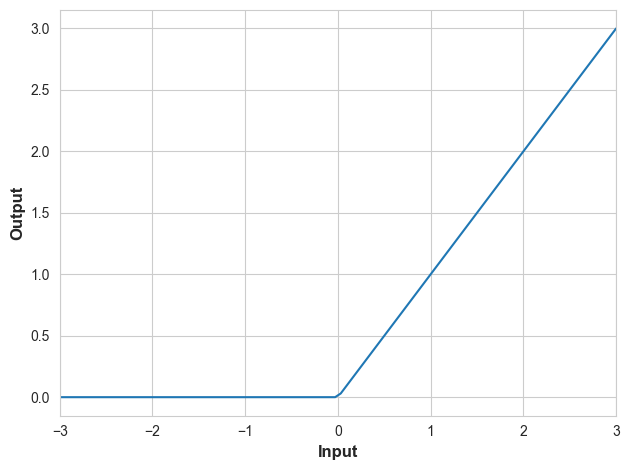

In [47]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

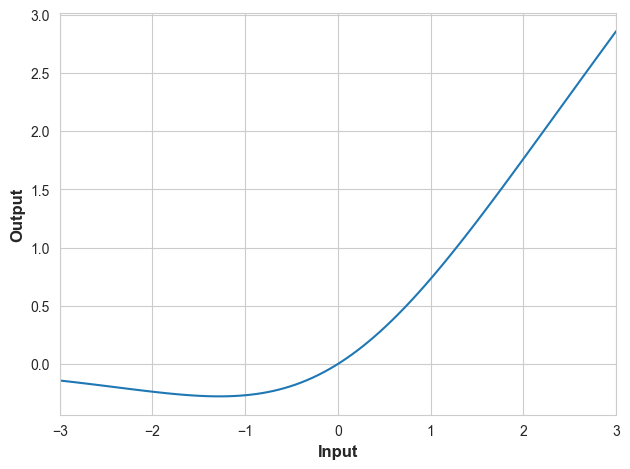

In [49]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

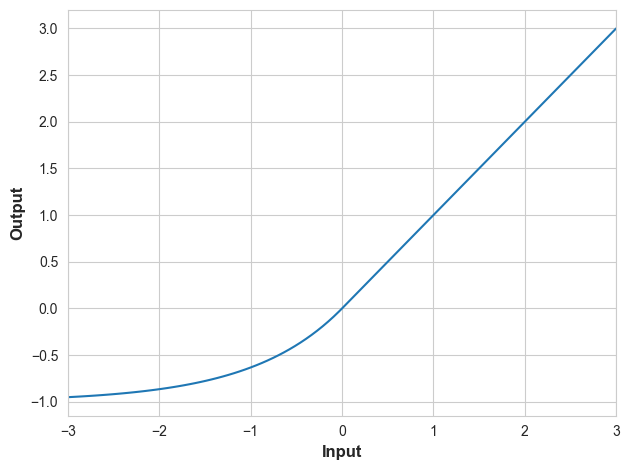

In [51]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

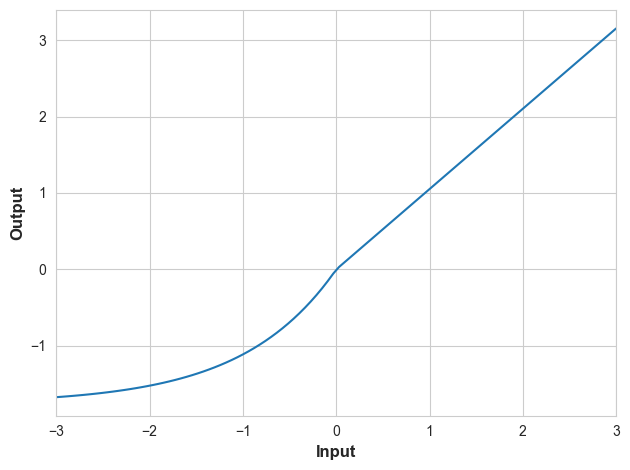

In [53]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()